# SYDE 556/750 --- Assignment 1
**Student ID: 21050969

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_01/syde556_assignment_01.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize # For question 2.1b)

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$

# 1. Representation of Scalars

## 1.1 Basic encoding and decoding

**a) Computing gain and bias.** In general, for a neuron model $a = G[J]$ (and assuming that the inverse $J = G^{-1}[a]$ exists), solve the following system of equations to compute the gain $\alpha$, and the bias $J^\mathrm{bias}$ given a maximum rate $a^\mathrm{max}$ and an $x$-intercept $\xi$.

$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}] \,, \quad\quad 0 = G[\alpha \xi + J^\mathrm{bias}] \,.$$

Now, simplify these equations for the specific case $G[J] = \max(J, 0)$.

✍
Considering this specific case, we get two equestions:
$$
a^{max} = \alpha + J^\mathrm{bias} \quad \quad 0 = \alpha\xi + J^\mathrm{bias}
$$
that give as the solutions:
$$
\alpha = \frac{a_{max}}{1 - \xi}
$$
\
$$
J^{bias} = \frac{\xi a_{max}}{\xi -1}
$$

**b) Neuron tuning curves.** Plot the neuron tuning curves $a_i(x)$ for 16 randomly generated neurons following the intercept and maximum rate distributions described above.

In [2]:
def init_alpha_and_J_bias(a_max_arr,xi_arr,encoders_arr,N):
    alpha_arr = np.zeros(N)
    J_bias_arr = np.zeros(N)
    for i in range(N):
        alpha_arr[i] = a_max_arr[i]/(1 - xi_arr[i])
        J_bias_arr[i] = -  alpha_arr[i] * xi_arr[i]
    return alpha_arr, J_bias_arr

In [3]:
# ✍ 
def init_A(N,x_scale):
    a_max_arr = np.random.uniform(100,200,N)
    xi_arr = np.random.uniform(-0.95,0.95,N)
    encoders_arr = np.random.choice([-1,1],N)
   
    alpha_arr, J_bias_arr = init_alpha_and_J_bias(a_max_arr,xi_arr,encoders_arr,N)

    M = len(x_scale)
    A = np.zeros([N,M])

    for i in range(N):
        for j in range (M):
            a =  alpha_arr[i]*x_scale[j]*encoders_arr[i] + J_bias_arr[i]
            A[i][j] = max(0,a)      
    return A

In [4]:
def plot_A(A,x_scale):
    N = len(A)
    plt.figure(figsize=(5,5))
    for i in range(N):
        plt.plot(x_scale,A[i])
    plt.title("Population Tuning Curves")
    plt.ylabel("Firing Rate (Hz)")
    plt.xlabel("Represented value x")
    plt.xlim(-1,1);
    plt.ylim(0,200)

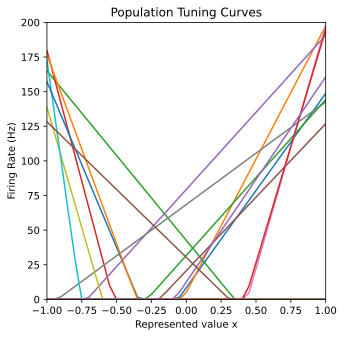

In [5]:
# ✍ 
N = 16
steps = 41
x_scale = np.linspace(-1,1 ,steps)
A = init_A(N,x_scale)
plot_A(A,x_scale)

**c) Computing identity decoders.** Compute the optimal identity decoder $\vec d$ for those 16 neurons (as shown in class). Report the value of the individual decoder coefficients. Compute $d$ using the matrix notation mentioned in the course notes. Do not apply any regularization. $A$ is the matrix of activities (the same data used to generate the plot in 1.1b).

In [6]:
def decoder(A, X, sigma) :
    A_t = np.transpose(A)
    N = len(A)
    d = np.dot(np.dot(np.linalg.inv(np.dot(A, A_t) + N*(sigma)**2*np.identity(N)),A),X)
    return d

✍ take $G$ inverse:
$$
\alpha + J^{bias} = G^{-1}[a_{max}] \quad\quad
\alpha \xi + J^{bias} = G^{-1}[0]
$$
from the first equation:

$$
\alpha = G^{-1}[a_{max}] - J^{bias}
$$
substitute to the second one:

$$  
(G^{-1}[a_{max}] - J^{bias}) \xi + J^{bias} = G^{-1}[0] \Rightarrow J^{bias}(1 - \xi) = G^{-1}[0] - G^{-1} [a_{max}]\xi  \Rightarrow  J^{bias} = \frac{G^{-1}[0] - G^{-1} [a_{max}]\xi}{1 - \xi}
$$

substitute to the first equetion:
$$
\alpha = G^{-1}[a_{max}] - \frac{G^{-1}[0] - G^{-1} [a_{max}]\xi}{1 - \xi}  \Rightarrow  \frac{G^{-1}[a_{max}](1 - \xi)  - G^{-1}[0] + G^{-1} [a_{max}]\xi}{1 - \xi} \Rightarrow \frac{G^{-1}[a_{max}]- G^{-1}[0]}{1 - \xi}
$$

say   $ \quad G^{-1}[0] = J_{th}:$
$$
\alpha = \frac{G^{-1}[a_{max}] - J_{th}}{1 - \xi } 
$$

$$
J^{bias} = \frac{J_{th} - \xi G^{-1}[a_{max}]}{1 -\xi}
$$

In [7]:
# ✍ 
d = decoder(A,x_scale,0)

print('the optimal identity decoder: \n')
print(d)

the optimal identity decoder: 

[-6.84396058e-04  2.23289544e-04 -4.70247749e-03 -3.01048658e-04
 -5.25274610e-04 -1.83602751e-03 -2.90982032e-03 -8.75973780e-04
  1.77910608e-04  9.05561543e-05 -2.23923278e-02  1.70203040e-02
  8.34612736e-03  4.04760113e-03  6.11897012e-04  2.34378302e-03]


**d) Evaluating decoding errors.** Compute and plot $\hat{x}=\sum_i d_i a_i(x)$. Overlay on the plot the line $y=x$. Make a separate plot of $x-\hat{x}$ to see what the error looks like. Report the Root Mean Squared Error (RMSE) value.

In [8]:
def evaluate_decoding_errors(d,A,x_scale):
    x_est = np.dot(d,A)
    error = x_est - x_scale

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
    fig.tight_layout(pad=5.0)
    ax1.plot(x_scale,x_scale  ,label ="x")
    ax1.plot(x_scale,x_est,label ="x'")
    ax1.title.set_text('Ideal and Decoded Value')
    ax1.set_xlabel('Represented value x')
    ax1.set_ylabel("Decoded value x'")

    ax2.plot(x_scale,error,label ="x' - x")
    ax2.title.set_text('Error after Decoding')
    ax2.set_xlabel('Represented value x')
    ax2.set_ylabel("Error  x' - x")

    #mean squared error
    e = np.sqrt(np.power(error,2).mean())
    return e

RMSE: 

0.002597990061260853


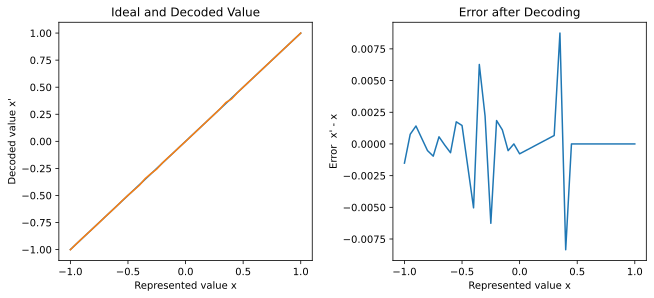

In [9]:
# ✍ 
e = evaluate_decoding_errors(d,A,x_scale)
print('RMSE: \n')
print(e)

**e) Decoding under noise.** Now try decoding under noise. Add random normally distributed noise to $a$ and decode again. The noise is a random variable with mean $\mu=0$ and standard deviation of $\sigma=0.2 \max(A)$ (where $\max(A)$ is the maximum firing rate of all the neurons). Resample this variable for every different $x$ value for every different neuron. Create all the same plots as in part d). Report the RMSE.

In [10]:
def init_noisy_A(A,sigma):
    noise_of_A = np.random.normal(0,sigma,np.shape(A))
    return A + noise_of_A

RMSE: 

1.096039438303938


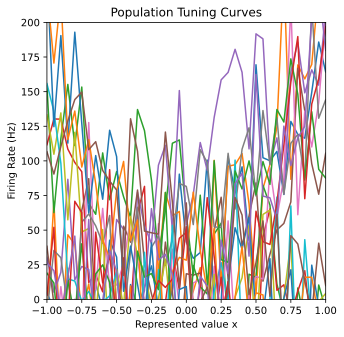

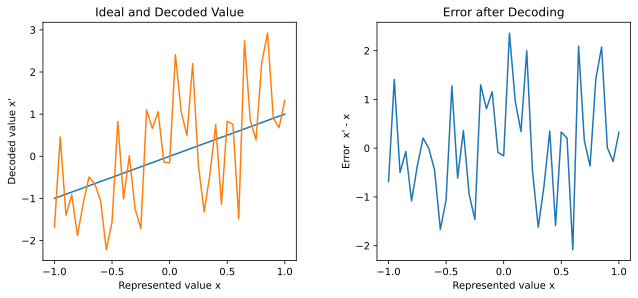

In [11]:
# ✍ 
sigma = 0.2 * np.amax(A)

A_with_noise = init_noisy_A(A,sigma)
plot_A(A_with_noise,x_scale)

#mean squared error
e1 = evaluate_decoding_errors(d,A_with_noise,x_scale)
print('RMSE: \n')
print(e1)


**f) Accounting for decoder noise.** Recompute the decoder $\vec d$ taking noise into account (i.e., apply the appropriate regularization, as shown in class). Show how these decoders behave when decoding both with and without noise added to $a$ by making the same plots as in d) and e). Report the RMSE for all cases.

RMSE (decoder is optimized, the values have a noise): 

0.14905039313176738

RMSE (decoder is optimized, the values do not have a noise): 

0.030965670525186756


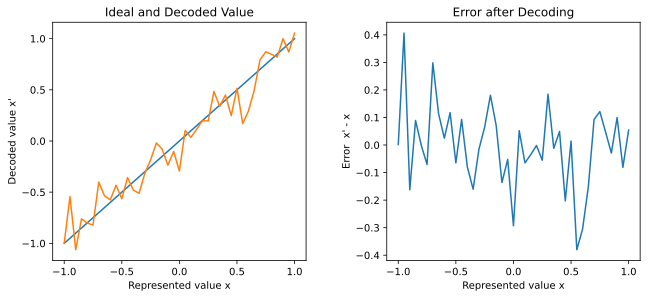

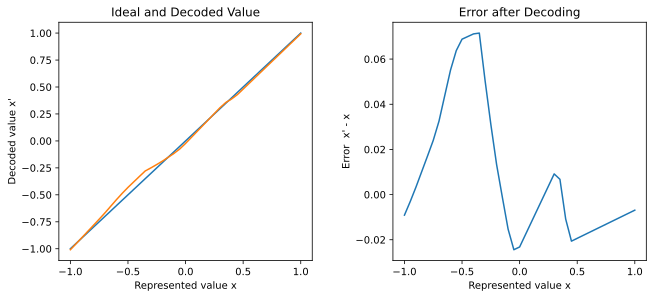

In [12]:
# ✍ 
#decoder with taking noise into account
d_optimized = decoder(A,x_scale,sigma)

#mean squared error
e1 = evaluate_decoding_errors(d_optimized,A_with_noise,x_scale)
print('RMSE (decoder is optimized, the values have a noise): \n')
print(e1)

#mean squared error
e2 = evaluate_decoding_errors(d_optimized,A,x_scale)
print('\nRMSE (decoder is optimized, the values do not have a noise): \n')
print(e2)

**g) Interpretation.** Show a 2x2 table of the four RMSE values reported in parts d), e), and f). This should show the effects of adding noise and whether the decoders $d$ are computed taking noise into account. Write a few sentences commenting on what the table shows, i.e., what the effect of adding noise to the activities is with respect to the measured error and why accounting for noise when computing the decoders increases/decreases/does not change the measured RMSE.

✍ 
<table>
    <tr>
        <th></th>
        <th>Activity without a noise</th>
        <th>Activity with a noise</th>
    </tr>
    <tr>
        <td>Decoder not taking noise into account</td>
        <td>0.0025979900612610038</td>
        <td>1.0960394385825893</td>
    </tr>
    <tr>
        <td>Decoder taking noise into account</td>
        <td>0.0309656705251866</td>
        <td>0.14905039313176838</td>
    </tr>
</table>


The results show that a decoder that does not consider noise in activities performs very poorly in situations where noise is still present. In contrast, the decoder , which takes into account the presence of noise in the activities, decodes x with a much lower error rate. Moreover, it decodes noise-free data almost as well as one designed for noise-free decoding, showing a low level of error.

## 1.2 Exploring sources of error

**a) Exploring error due to distortion and noise.** Plot the error due to distortion $E_\mathrm{dist}$ and the error due to noise $E_\mathrm{noise}$ as a function of $n$, the number of neurons. Generate two different loglog plots (one for each type of error) with $n$ values of at least $[4, 8, 16, 32, 64, 128, 256, 512]$. For each $n$ value, do at least $5$ runs and average the results. For each run, different $\alpha$, $J^\mathrm{bias}$, and $e$ values should be generated for each neuron. Compute $d$ taking noise into account, with $\sigma = 0.1 \max(A)$. Show visually that the errors are proportional to $1/n$ or $1/n^2$.

In [13]:
# ✍ 
def compute_error_due_to_distortion(x_scale, x_est):   
    error = np.subtract(x_scale,x_est)
    return  0.5*np.average(np.square(error))
    return 0.5*res

def compute_error_due_to_noise(d, sigma):
    return (sigma**2)*np.sum(np.square(d))

In [14]:
def compute_error(x_scale, sigma_scale, n_values,runs_num):
    n_val = len(n_values)
    error_due_to_distortion = np.zeros(n_val)
    error_due_to_noise = np.zeros(n_val)

    for i in range(n_val):
        distortion_error = 0
        noise_error = 0
        for j in range (runs_num):   
            A = init_A(n_values[i],x_scale)
            sigma = sigma_scale * np.amax(A)
            d = decoder(A, x_scale, sigma)
            x_est = np.dot(d,A)
            distortion_error += compute_error_due_to_distortion(x_scale,x_est)
            noise_error += compute_error_due_to_noise(d,sigma)

        error_due_to_distortion[i] = distortion_error/runs_num
        error_due_to_noise[i] = noise_error/runs_num 
    
    return error_due_to_distortion, error_due_to_noise


In [15]:
def print_error(error_due_to_distortion,error_due_to_noise,n_1,n_2):
    plt.figure(figsize=(12,3))
    plt.loglog(n_values, error_due_to_distortion, label ="distortion error")
    plt.loglog(n_values,n_2, 'r--', label ="1/n^2")
    plt.legend()

    plt.figure(figsize=(12,3))
    plt.loglog(n_values,error_due_to_noise,label ="noise error")
    plt.loglog(n_values,n_1,'o--',label ="1/n")
    plt.legend()

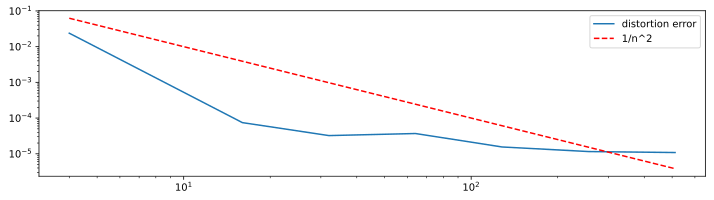

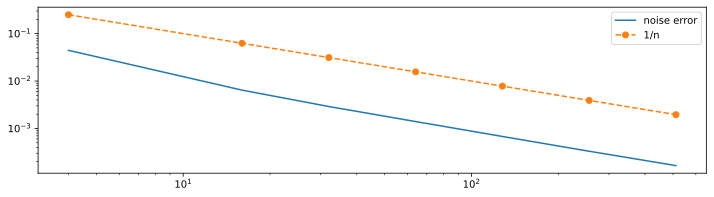

In [16]:
# ✍ 
n_values = [4,16,32, 64,128,256,512]
runs_num = 5
n_1 = np.float_power(n_values,-1)
n_2 = np.float_power(n_values,-2)
sigma_scale =0.1
error_due_to_distortion , error_due_to_noise  = compute_error(x_scale,sigma_scale,n_values,runs_num)
print_error(error_due_to_distortion,error_due_to_noise,n_1,n_2)

**b) Adapting the noise level.** Repeat part a) with $\sigma = 0.01 \max(A)$.

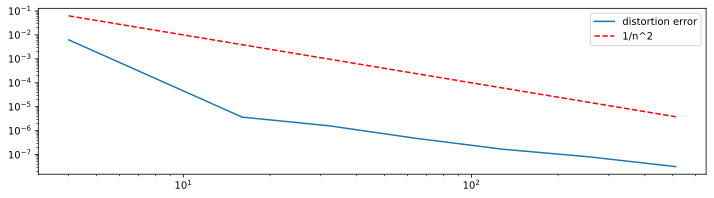

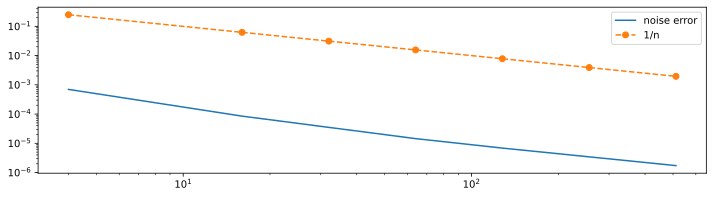

In [17]:
# ✍ 
sigma_scale =0.01
error_due_to_distortion , error_due_to_noise  = compute_error(x_scale,sigma_scale,n_values,runs_num)
print_error(error_due_to_distortion,error_due_to_noise,n_1,n_2)

**c) Interpretation.** What does the difference between the graphs in a) and b) tell us about the sources of error in neural populations?

✍ We see that the error due to distortion $E_{dist}$ is proportional to $1/n^{2}$, especially when there is considered less noise in the decoder. Basically, the overall error value decreases sharply with less noise, and with an increase in the number of neurons, the overall error level depends more on the noise component. Also, it is clearly seen that the error due to noise $E_{noise}$ is proportional to $1/n$.

## 1.3 Leaky Integrate-and-Fire neurons

**a) Computing gain and bias.** As in the second part of 1.1a), given a maximum firing rate $a^\mathrm{max}$ and a bias $J^\mathrm{bias}$, write down the equations for computing $\alpha$ and the $J^\mathrm{bias}$ for this specific neuron model.

✍✍equation:
$$
G[J] = \begin{cases}
\frac{1}{\tau_{ref} - \tau_{RC} \ \mathrm{ln}(1 - \frac{1}{J}) } & J>1,\\
0 & \text{otherwise}
\end{cases}
$$

substitute $J = \alpha\xi + J^\mathrm{bias}$ to the equation:
$$0 = G[\alpha \xi + J^\mathrm{bias}] $$

we get:
$$\alpha \xi + J^\mathrm{bias} =1 \\ J^\mathrm{bias} = 1 - \alpha \xi $$

substitute $J = \alpha + J^\mathrm{bias}$ to the equation:
$$a^\mathrm{max} = G[\alpha + J^\mathrm{bias}]$$ 
and considering that $100 \leq a^\mathrm{max} \leq 200$ we get:

$$
\frac{1}{\tau_{ref} - \tau_{RC} \ \mathrm{ln}(1 - \frac{1}{\alpha + J^\mathrm{bias}}) }  = a^\mathrm{max}
$$
considering $J_{bias}$: 
$$
\frac{1}{\tau_{ref} - \tau_{RC} \ \mathrm{ln}(1 - \frac{1}{\alpha  - \alpha \xi + 1}) }  = a^\mathrm{max} \\
\frac{1}{\tau_{ref} - \tau_{RC} \ \mathrm{ln}(1 - \frac{1}{\alpha (1 - \xi) + 1}) }  = a^\mathrm{max} \\
\tau_{ref} - \tau_{RC} \ \mathrm{ln}(1 - \frac{1}{\alpha (1 - \xi) + 1})   = \frac{1}{a^\mathrm{max}} \\
\tau_{RC} \ \mathrm{ln}(1 - \frac{1}{\alpha (1 - \xi) + 1})   = \tau_{ref} - \frac{1}{a^\mathrm{max}} \\
\mathrm{ln}(1 - \frac{1}{\alpha (1 - \xi) + 1})   = \frac{\tau_{ref} - \frac{1}{a^\mathrm{max}}}{\tau_{RC}} =  \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}} \\
1 - \frac{1}{\alpha (1 - \xi) + 1} = \mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}} \\
\frac{1}{\alpha (1 - \xi) + 1} = 1 - \mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}} \\
\alpha (1 - \xi) + 1 = \frac{1}{1 - \mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}}} \\
\alpha (1 - \xi)  = \frac{1}{1 - \mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}}} - 1\\
\alpha  = \frac{1}{(1 - \xi)(1 - \mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}})} - \frac{1}{(1 - \xi)}\\
$$
Final answer:
$$
\alpha  = \frac{\mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}}}{(1 - \xi)(1 - \mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}})}
$$
and $J_{bias}$:
$$
J_{bias} = 1 - \alpha \xi = 1 - \frac{\xi\mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}}}{(1 - \xi)(1 - \mathrm{e}^{ \frac{\tau_{ref}a^\mathrm{max} - 1}{\tau_{RC} a^\mathrm{max}}})}
$$

**b) Neuron tuning curves.** Generate the same plot as in 1.1b). Use $\tau_\mathrm{ref}=2 \mathrm{ms}$ and $\tau_{RC}=20 \mathrm{ms}$. Use the same distribution of $x$-intercepts and maximum firing rates as in 1.1.

In [18]:
def LIF_init_alpha_and_J_bias(a_max_arr,xi_arr,encoders_arr,N, tau_ref, tau_RC):
    denominator = np.zeros(N)
    alpha_arr  = np.zeros(N)
    J_bias_arr = np.zeros(N)
    
    for i in range(N):
        denominator[i] = (1 - xi_arr[i])*(1 - np.exp((tau_ref*a_max_arr[i] - 1)/(tau_RC * a_max_arr[i])))
        alpha_arr[i] = 1/denominator[i] -1/(1 - xi_arr[i])
        J_bias_arr[i] = 1 -alpha_arr[i]*xi_arr[i]
    return alpha_arr, J_bias_arr


In [19]:
def LIF_init_A(N,x_scale,tau_ref, tau_RC ):
    a_max_arr = np.random.uniform(100,200,N)
    xi_arr = np.random.uniform(-0.95,0.95,N)
    encoders_arr = np.random.choice([-1,1],N)
   
    alpha_arr, J_bias_arr = LIF_init_alpha_and_J_bias(a_max_arr,xi_arr,encoders_arr,N, tau_ref, tau_RC)
    
    M = len(x_scale)
    A = np.zeros([N,M])

    for i in range(N):
        for j in range (M):
            l =  alpha_arr[i]*x_scale[j]*encoders_arr[i] + J_bias_arr[i]
            a = 0
            if(l > 1):
                a = np.float_power(tau_ref - (tau_RC*np.log(1-np.float_power(l,-1))),-1)
            A[i][j] = a      
    return A

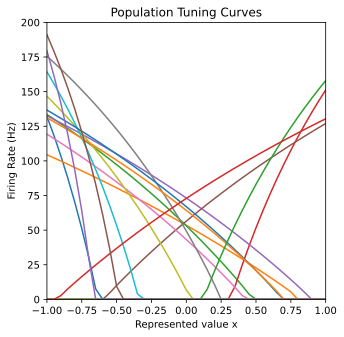

In [20]:
N = 16
steps = 41
tau_ref = 0.002
tau_RC = 0.2
x_scale = np.linspace(-1,1 ,steps)

A = LIF_init_A(N,x_scale,tau_ref, tau_RC)
plot_A(A,x_scale)

**c) Impact of noise.** Generate the same four plots as in 1.1f) (adding/not adding noise to $A$, accounting/not accounting for noise when computing $\vec d$), and report the RMSE both with and without noise.

In [21]:
# ✍ 
sigma = 0.2*np.amax(A)
A_with_noise = init_noisy_A(A,sigma)
d = decoder(A,x_scale,0)
d_optimized = decoder(A,x_scale,sigma)

RMSE (A is without noise, decoder doesn't account for noise): 

0.005026929418921472


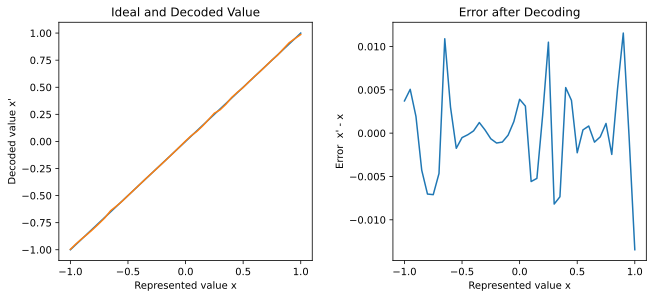

In [22]:
e = evaluate_decoding_errors(d,A,x_scale)
print("RMSE (A is without noise, decoder doesn't account for noise): \n")
print(e)


RMSE (A is without noise, decoder accounts for noise): 

0.02621674412476339


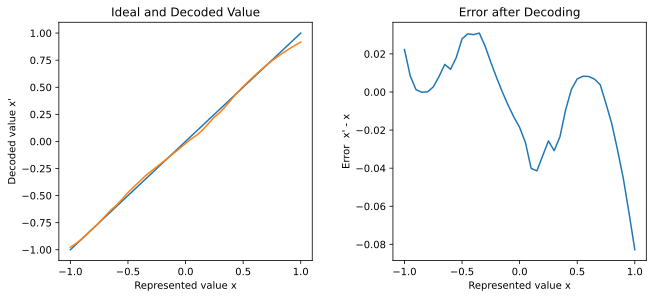

In [23]:
e1 = evaluate_decoding_errors(d_optimized,A,x_scale)
print("\nRMSE (A is without noise, decoder accounts for noise): \n")
print(e1)


RMSE (A is with noise, decoder doesn't account for noise): 

0.5045110320442053


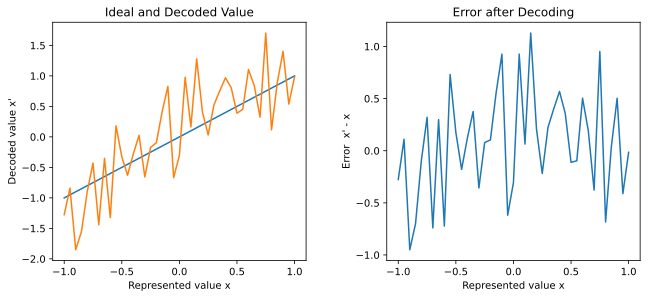

In [24]:
e2 = evaluate_decoding_errors(d,A_with_noise,x_scale)
print("\nRMSE (A is with noise, decoder doesn't account for noise): \n")
print(e2)


RMSE (A is with noise, decoder  accounts for noise): 

0.14720745346938005


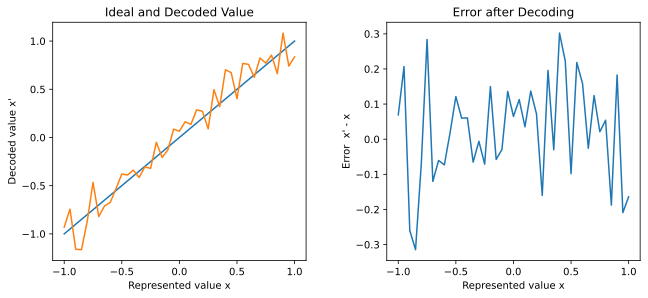

In [25]:
e3 = evaluate_decoding_errors(d_optimized,A_with_noise,x_scale)
print("\nRMSE (A is with noise, decoder  accounts for noise): \n")
print(e3)

Root mean square error table:
<table>
    <tr>
        <th></th>
        <th>Activity without a noise</th>
        <th>Activity with a noise</th>
    </tr>
    <tr>
        <td>Decoder not taking noise into account</td>
        <td>0.005026929418921472</td>
        <td>0.5045110320442053</td>
    </tr>
    <tr>
        <td>Decoder taking noise into account</td>
        <td>0.02621674412476339</td>
        <td>0.14720745346938005</td>
    </tr>
</table>


# 2. Reperesentation of Vectors

## 2.1 Vector tuning curves

**a) Plotting 2D tuning curves.** Plot the tuning curve of an LIF neuron whose 2D preferred direction vector is at an angle of $\theta=-\pi/4$, has an $x$-intercept at the origin $(0,0)$, and has a maximum firing rate of $100 \mathrm{Hz}$.

In [26]:
def init_2D_LIF_neuron(a_max, xi,tau_rc,tau_ref):
    alpha =np.exp((tau_ref*a_max - 1)/(tau_rc*a_max))/((1 - np.exp((tau_ref*a_max - 1)/(tau_rc*a_max)))*(1 - np.dot(xi,xi)))
    jBias = 1 - alpha*np.dot(xi,xi)
    return alpha, jBias

In [27]:
def init_2D_A(coords,e, tau_rc, tau_ref, alpha,jBias):
    A = []
    for c in coords:
        J = alpha*np.dot(c,e) + jBias
        a = 0
        if (J > 1):
            a = 1/(tau_ref - (tau_rc*np.log(1-1/J)))
        A.append(a)
    return A

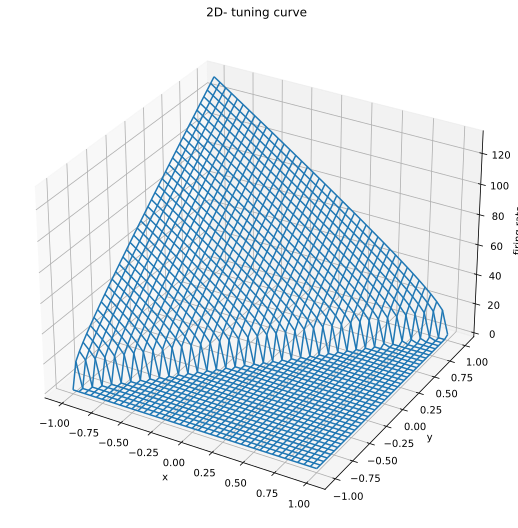

In [28]:
# ✍ 
from mpl_toolkits.mplot3d import Axes3D
steps =41
a_max = 100
xi = [0,0]
theta = -np.pi/4
e=[np.cos(theta),np.sin(theta)]
tau_ref = 0.0002
tau_rc = 0.02

alpha, jBias = init_2D_LIF_neuron(a_max, xi,tau_rc,tau_ref)

x = np.linspace(-1,1,steps)
y = np.linspace(-1,1,steps)
coords =[]
for i in range(len(x)):
    for j in range(len(y)):
        coords.append([x[i],y[j]])

A = init_2D_A(coords,e, tau_rc, tau_ref, alpha,jBias)
A = np.reshape(A,(steps,steps))

x,y = np.meshgrid(x,y)

fig = plt.figure(figsize=(10,9))
axes1 = fig.add_subplot(projection = '3d')
axes1.set_title("2D- tuning curve")
axes1.set_xlabel("x")
axes1.set_ylabel("y")
axes1.set_zlabel("firing rate")
surf = axes1.plot_wireframe(X = x, Y = y, Z = A , cmap='viridis')

**b) Plotting the 2D tuning curve along the unit circle.** Plot the tuning curve for the same neuron as in a), but only considering the points around the unit circle, i.e., sample the activation for different angles $\theta$. Fit a curve of the form $c_1 \cos(c_2\theta+c_3)+c_4$ to the tuning curve and plot it as well.

In [29]:
# ✍ 
def cos_curve(theta,c1,c2,c3,c4):
    return c1 * np.cos(c2 * theta + c3) + c4

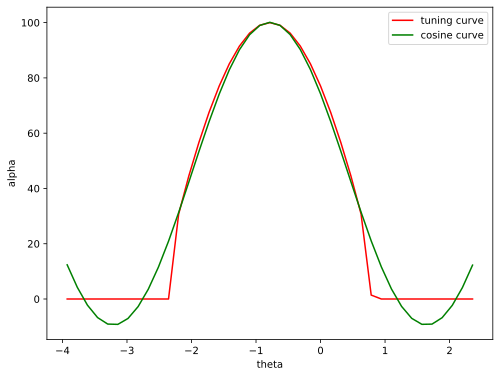

In [30]:
# ✍ 
from scipy.optimize import curve_fit
theta_arr = np.linspace(-np.pi+theta,np.pi+theta,steps)
c= []
for t in theta_arr:
    c.append([np.cos(t),np.sin(t)])
    
    
A = init_2D_A(c,e, tau_rc, tau_ref, alpha,jBias)

popt, pcov = curve_fit(cos_curve, theta_arr, A)

fig = plt.figure(figsize=(8,6))
axes1 = fig.add_subplot()
axes1.plot(theta_arr, A, 'r', label = 'tuning curve')
axes1.plot(theta_arr, cos_curve(theta_arr,*popt), 'g', label = 'cosine curve')
axes1.set_ylabel("alpha")
axes1.set_xlabel("theta")
axes1.legend()

**c) Discussion.** What makes a cosine a good choice for the curve fit in 2.1b? Why does it differ from the ideal curve?

✍ A cosine curve accurately simulates the rapid increase in alpha values during a unit circle while climbing to the maximum value a_max. That makes a cosine a right choise. In particular, it captures very precisely the characteristics of a circular curve that reaches its highest point. But the cosine curve doesn't do well with segments when the neuron is not activated, because negative values and the smoothness of the cosine curve in general are unrealistic.

## 2.2 Vector representation

**a) Choosing encoding vectors.** Generate a set of $100$ random unit vectors uniformly distributed around the unit circle. These will be the encoders $\vec e$ for $100$ neurons. Plot these vectors with a quiver or line plot (i.e., not just points, but lines/arrows to the points).

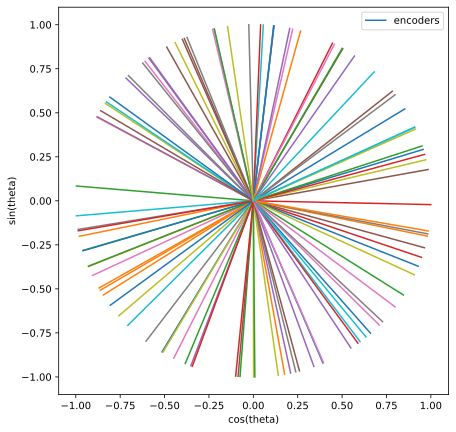

In [31]:
# ✍ 
N = 100
theta_rand_arr = np.random.uniform(-np.pi,np.pi,N)

encoders_arr = []
for t in theta_rand_arr:
    encoders_arr.append([np.cos(t),np.sin(t)])
    
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.set_xlabel('cos(theta)')
ax.set_ylabel('sin(theta)')
for e in encoders_arr:
    ax.plot([0,e[0]],[0,e[1]])
ax.legend(['encoders'])

**b) Computing the identity decoder.** Use LIF neurons with the same properties as in question 1.3. When computing the decoders, take into account noise with $\sigma = 0.2\max(A)$. Plot the decoders in the same way you plotted the encoders.

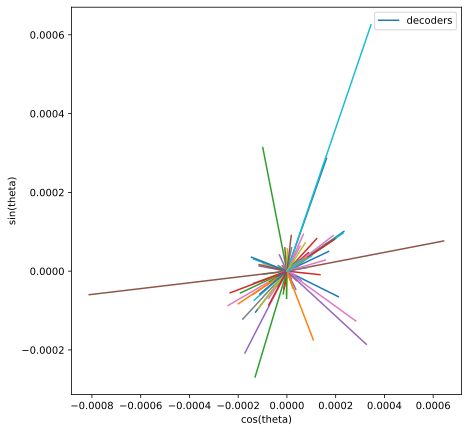

In [32]:
# ✍ 
a_max_arr = np.random.uniform(100,200,N)
xi_arr = [[np.random.uniform(-0.95,0.95),np.random.uniform(-0.95,0.95)] for n in range(N)]
x = np.linspace(-1,1,steps)
y = np.linspace(-1,1,steps)
coords =[]
for i in range(len(x)):
    for j in range(len(y)):
        coords.append([x[i],y[j]])

        
A = []
for i in range(N):
    alpha, j_bias = init_2D_LIF_neuron(a_max_arr[i],xi_arr[i],tau_rc,tau_ref)
    a = init_2D_A(coords,encoders_arr[i], tau_rc, tau_ref, alpha,j_bias)
    A.append(a)
    
sigma = 0.2*np.amax(A)
dec = decoder(A,coords,sigma)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot()
ax.set_xlabel('cos(theta)')
ax.set_ylabel('sin(theta)')
for d in dec:
    ax.plot([0,d[0]],[0,d[1]])
ax.legend(['decoders'])

**c) Discussion.** How do these decoding vectors compare to the encoding vectors?

✍ Decoder vectors generally have a distribution of directions close to encoders, but they clearly do not reproduce the original length of encoders, being much shorter.

**d) Testing the decoder.** Generate 20 random $\vec x$ values throughout the unit circle (i.e.,~with different directions and radiuses). For each $\vec x$ value, determine the neural activity $a_i$ for each of the 100 neurons. Now decode these values (i.e. compute $\hat{x} = D \vec a$) using the decoders from part b). Plot the original and decoded values on the same graph in different colours, and compute the RMSE.

RMSE: 
0.06182763381201866
RMSE normalized: 
0.01727421040455143


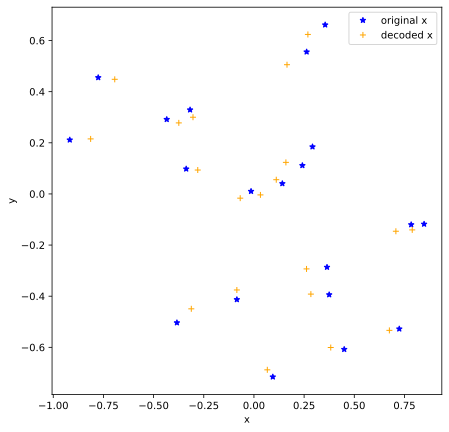

In [33]:
# ✍ 
xn = 20
t_arr = np.random.uniform(-np.pi,np.pi,xn)
r_arr = np.random.uniform(0,1,xn)
x_original = [[r_arr[i]*np.cos(t_arr[i]),r_arr[i]*np.sin(t_arr[i])] for i in range(xn)]

A = []
for i in range(N):
    alpha, j_bias = init_2D_LIF_neuron(a_max_arr[i],xi_arr[i],tau_rc,tau_ref)
    a = init_2D_A(x_original,encoders_arr[i], tau_rc, tau_ref, alpha,j_bias)
    A.append(a)
    
x_dec = np.dot(np.transpose(A),dec) 

plt.figure(figsize=(7,7))


x1 = [x_original[i][0] for i in range(xn)]
y1 = [x_original[i][1] for i in range(xn)]
plt.plot(x1,y1,'*', color ='b',label = "original x")   

x2 = [x_dec[i][0] for i in range(xn)]
y2 = [x_dec[i][1] for i in range(xn)]
plt.plot(x2,y2,'+',color = 'orange',label = "decoded x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


error = x_original-x_dec
e = np.sqrt(np.power(error,2).mean())
print("RMSE: ")
print(e)

x_orginal_norm = x_original/(np.sqrt(np.sum(np.power(x_original,2))))
x_dec_norm = x_dec/(np.sqrt(np.sum(np.power(x_dec,2))))

error_norm = x_orginal_norm-x_dec_norm
e_norm = np.sqrt(np.power(error_norm,2).mean())
print("RMSE normalized: ")
print(e_norm)

**e) Using encoders as decoders.** Repeat part d) but use the *encoders* as decoders. This is what Georgopoulos used in his original approach to decoding information from populations of neurons. Plot the decoded values and compute the RMSE. In addition, recompute the RMSE in both cases, but ignore the magnitude of the decoded vectors by normalizing before computing the RMSE.

RMSE (encoders are used instead of decoders): 
3304.1198409583635
RMSE normalized (encoders are used instead of decoders): 
0.22416027709954184


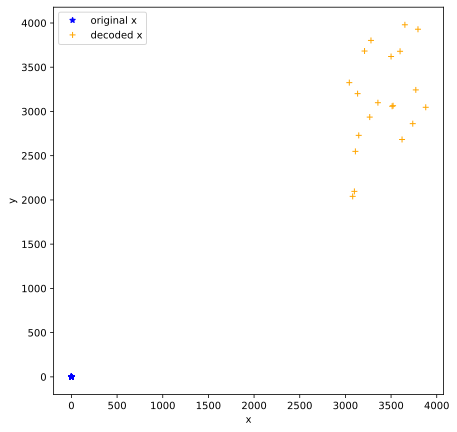

In [34]:
# ✍ 
x_dec = np.dot(np.transpose(A),encoders_arr) 

plt.figure(figsize=(7,7))
plt.plot(x1,y1,'*', color ='b',label = "original x")   

x2 = [x_dec[i][0] for i in range(xn)]
y2 = [x_dec[i][1] for i in range(xn)]
plt.plot(x2,y2,'+',color = 'orange',label = "decoded x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

error = x_original-x_dec
e = np.sqrt(np.power(error,2).mean())
print("RMSE (encoders are used instead of decoders): ")
print(e)

x_orginal_norm = x_original/(np.sqrt(np.sum(np.power(x_original,2))))
x_dec_norm = x_dec/(np.sqrt(np.sum(np.power(x_dec,2))))

error_norm = x_orginal_norm-x_dec_norm
e_norm = np.sqrt(np.power(error_norm,2).mean())
print("RMSE normalized (encoders are used instead of decoders): ")
print(e_norm)

**f) Discussion.** When computing the RMSE on the normalized vectors, using the encoders as decoders should result in a larger, yet still surprisingly small error. Thinking about random unit vectors in high dimensional spaces, why is this the case? What are the relative merits of these two approaches to decoding?

✍ Calculating decoders using the applied method is a computationally difficult task, so it can take a lot of resources, although the decoding of the initial vectors is quite accurate. On the other hand, the decoding method using encoders does not reproduce the length (as a result values are huge), only the direction. Therefore, when normalizing the vectors, the error is reduced to a very low level.